In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import *
from tkinter import ttk
import csv
import numpy as np

csv_file_path = "Bellevue Nissan Reports.csv"
marked_cells = {}
data = []
data2 = []
list_of_dfs = {}

In [2]:
def get_row_count(csv_file_path):
    with open(csv_file_path, 'r') as file:
        count = 0
        for i in file:
            count += 1
    
    return count

with open(csv_file_path) as file:
    row_count = get_row_count(csv_file_path)
    for row in file:
        data.append(row)
    data2.append(data[0].split(","))
    for i in range(1, len(data) - 1, 1):
        '''
        split_row = row.split(",")
        for i in split_row:
            if i == "" or i == '\n':
                split_row.remove(i)
            else:
                continue
        data.append(split_row)
        '''
        
                    
        for a in data[i]: 
            line_with_value = False
            if a != ",":
                if a != "\n":
                    line_with_value = True
            if (data[i - 1] != data[i + 1]) or line_with_value:
                data2.append(data[i].split(","))
                break
    file.close()
        
    

#We have gotten rid of excess lines that contain purely commas
#Number of elements in each row is 26 even
#print(data[2][0])




In [108]:
def mark_df_as_seen(marked_cells, starting_i, starting_j, height, width):
    for row in range(starting_i, starting_i + height):
        for column in range(starting_j, starting_j + width):
            marked_cells[(row, column)] = True
    #return None


In [109]:
def create_df_no_title(darray, i, j):
    title = darray[i][j]
    starting_i = i
    starting_j = j
    height = 0
    width = 0
    while darray[starting_i][j] != "":
        width += 1
        j += 1
    while darray[i][starting_j] != "":
        height += 1
        i += 1
    matrix = []
    
    for g in range(starting_i, starting_i + height):
        temp_list = []
        for f in range(starting_j, starting_j + width):
            if "%" in darray[g][f]:
                temp_list.append(float(darray[g][f][:-1]))
                
            else:
                temp_list.append(darray[g][f])
        matrix.append(temp_list)
    df = pd.DataFrame(matrix)
    df.columns = df.iloc[0]
    df = df[1:]
    mark_df_as_seen(marked_cells, starting_i, starting_j, height, width)
    return df

In [110]:
def create_df_yes_title(darray, i, j):
    title = darray[i][j]
    marked_cells[(i,j)] = True
    i += 1
    if darray[i][j] == "":
        return None
    starting_i = i
    starting_j = j
    height = 0
    width = 0
    while darray[starting_i][j] != "":
        width += 1
        j += 1
    while darray[i][starting_j] != "":
        height += 1
        i += 1
    matrix = []
    
    for g in range(starting_i, starting_i + height):
        temp_list = []
        for f in range(starting_j, starting_j + width):
            if "%" in darray[g][f]:
                temp_list.append(float(darray[g][f][:-1]))
                
            else:
                temp_list.append(darray[g][f])
        matrix.append(temp_list)
    df = pd.DataFrame(matrix)
    df.columns = df.iloc[0]
    df = df[1:]
    mark_df_as_seen(marked_cells, starting_i - 1, starting_j, height + 1, width)
    return df

In [ ]:
'''
def parse_csv_file(csv_file_path):
    print(len(data2) - 1)
    print(len(data2[1]) - 1)
    for row in range(len(data2) - 1):
        for column in range(len(data2[row]) - 1):
            #print(f"row, column : {row},{column}")
            if row == 3 and column == 8:
                print("WARNING RUNTIME ERROR")

            if (row, column) in marked_cells:
                if (3,8) in marked_cells:
                    print("WARNING RUNTIME ERROR")
                continue
            else:
                if row == 3 and column == 8:
                    print("WARNING RUNTIME ERROR")

                #marked_cells[(row,column)] = True
                if (data2[row][column] == "") or (data2[row][column] == "\n"):
                    
                    continue
                else:
                    
                    if row == 3 and column == 8:
                        print("WARNING RUNTIME ERROR")
                    if (data2[row][column + 1] != ""):
                        list_of_dfs[(data2[row][column])] = create_df_no_title(data2, row, column)
                    else:
                        
                        list_of_dfs[(data2[row][column])] = create_df_yes_title(data2, row, column)



'''

def parse_csv_file(list_of_dfs, csv_file_path):
    return_value = list_of_dfs
    for row in range(len(data2)):
        for column in range(len(data2[row]) - 1):
            
            if (row, column) in marked_cells:
                continue
            else:
                
                #marked_cells[(row,column)] = True
                if (data2[row][column] == "") or (data2[row][column] == "\n"):
                    
                    continue
                else:
                    
                    if (data2[row][column + 1] != ""):
                        return_value.append(create_df_no_title(data2, row, column))
                    else:
                        
                        return_value.append(create_df_yes_title(data2, row, column))
    return return_value             
#'''

'\n\ndef parse_csv_file(list_of_dfs, csv_file_path):\n    return_value = list_of_dfs\n    for row in range(len(data2)):\n        for column in range(len(data2[row]) - 1):\n\n            if (row, column) in marked_cells:\n                continue\n            else:\n\n                #marked_cells[(row,column)] = True\n                if (data2[row][column] == "") or (data2[row][column] == "\n"):\n\n                    continue\n                else:\n\n                    if (data2[row][column + 1] != ""):\n                        return_value.append(create_df_no_title(data2, row, column))\n                    else:\n\n                        return_value.append(create_df_yes_title(data2, row, column))\n    return return_value             \n'

In [115]:
parse_csv_file("Bellevue Nissan Reports.csv")

28
25
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARNING RUNTIME ERROR
WARN

In [116]:
list_of_dfs

{'Bellevue Nissan': Empty DataFrame
 Columns: [May-25]
 Index: [],
 'KPI Goals': 0 KPI Goals Goal  MTD Variance  QTD Variance
 1     Sales  960  959     -0.1  984      2.5
 2   Service  902  986     9.31  962     6.65,
 'Sales Consultant KPI': None,
 'Service Advisor KPI': None,
 'QGP Metrics': None,
 'Finance KPI': None,
 'Nissan Connected Services': 0 Nissan Connected Services  Goal Actual Variance
 1                    Metric  70.0  100.0     43.0,
 'End of Term Leases': None}

In [8]:
print(list(list_of_dfs.keys()))

[]


In [82]:
a = parse_csv_file(list_of_dfs, "Bellevue Nissan Reports.csv")
print(a)

{'Bellevue Nissan': Empty DataFrame
Columns: [May-25]
Index: [], 'KPI Goals': 0 KPI Goals Goal  MTD Variance  QTD Variance
1     Sales  960  959     -0.1  984      2.5
2   Service  902  986     9.31  962     6.65, 'Sales Consultant KPI': None, 'Service Advisor KPI': None, 'QGP Metrics': None, 'Finance KPI': None, 'Nissan Connected Services': 0 Nissan Connected Services  Goal Actual Variance
1                    Metric  70.0  100.0     43.0, 'End of Term Leases': None}


In [54]:
abc = create_df_yes_title(data2, 3, 8)

abc

,NAME,MTD Count,MTD Score,QTD Count,QTD Score
1,Courtney Ruiz,1,980,8,995
2,Doug Truong,3,1000,15,987
3,Ernesto Rivera,3,957,12,983
4,Jeremy Williams,3,900,12,959
5,Nicholas Taylor,0,0,10,1000
6,Sean Light,0,0,0,0


In [117]:
list = abc.columns.tolist()
new_data = []
new_data.append(list)
for i in range(len(abc)):
    new_data.append(abc.iloc[i].tolist())
    
new_data

[['NAME', 'MTD Count', 'MTD Score', 'QTD Count', 'QTD Score'],
 ['Courtney Ruiz', '1', '980', '8', '995'],
 ['Doug Truong', '3', '1000', '15', '987'],
 ['Ernesto Rivera', '3', '957', '12', '983'],
 ['Jeremy Williams', '3', '900', '12', '959'],
 ['Nicholas Taylor', '0', '0', '10', '1000'],
 ['Sean Light ', '0', '0', '0', '0']]

In [71]:
with open("tamp_output.csv", 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(new_data)
    file.close()

In [130]:
def func2(csvfilename):
    df = pd.read_csv(csvfilename)
    columns = df.columns.tolist()
    fig, axes = plt.subplots(1, len(columns) - 1, figsize=(20,4))
    data = []
    for i in range(len(columns) - 1):
        ylabel = columns[i].split(" ")
        axes[i].bar(df[columns[0]], df[columns[i + 1]])
        axes[i].set_title(columns[i + 1])
        axes[i].set_ylabel(ylabel[0])
        axes[i].tick_params(labelrotation=45, axis='x') 
    plt.tight_layout()
    plt.show()

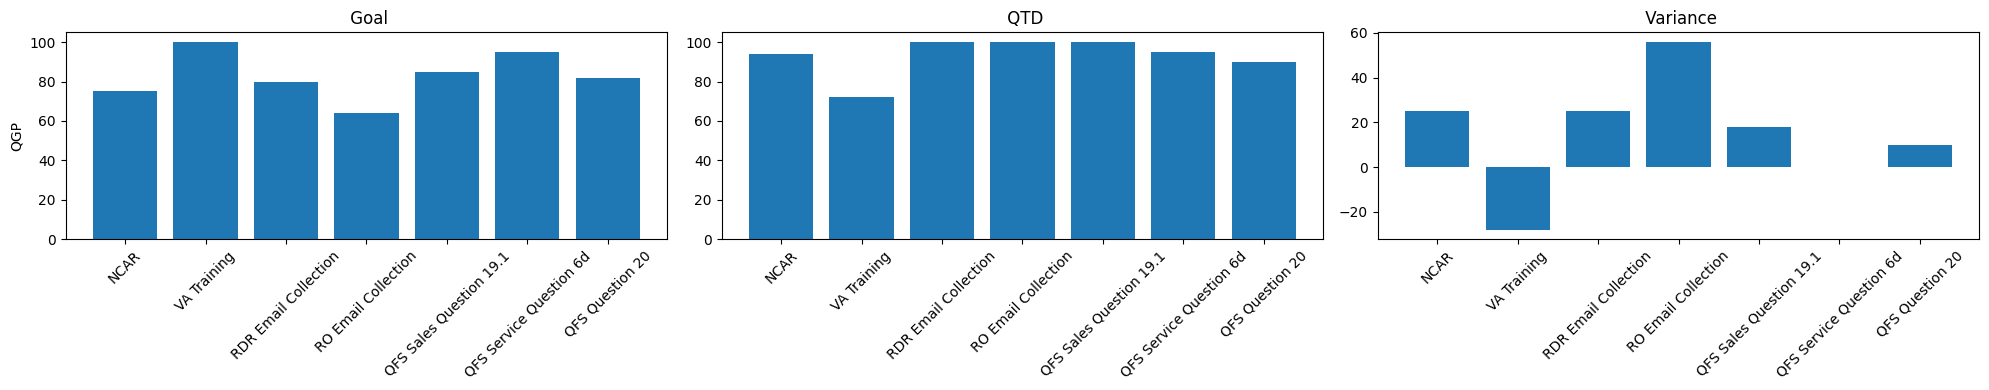

In [134]:
func2("tamp_input.csv")

In [ ]:
for i in list:
    print(abc[i].tolist())

['Courtney Ruiz', 'Doug Truong', 'Ernesto Rivera', 'Jeremy Williams', 'Nicholas Taylor', 'Sean Light ']
['1', '3', '3', '3', '0', '0']
['980', '1000', '957', '900', '0', '0']
['8', '15', '12', '12', '10', '0']
['995', '987', '983', '959', '1000', '0']


In [39]:
list

['NAME', 'MTD Count', 'MTD Score', 'QTD Count', 'QTD Score']

In [13]:
data2

[['Bellevue Nissan',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '\n'],
 ['May-25',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '\n'],
 ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '\n'],
 ['KPI Goals',
  'Goal',
  'MTD',
  'Variance',
  'QTD',
  'Variance',
  '',
  '',
  'Sales Consultant KPI',
  '',
  '',
  '',
  '',
  '',
  'Service Advisor KPI',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '\n'],
 ['Sales',
  '960',
  '959',
  '-0.10%',
  '984',
  '2.50%',
  '',
  '',
  'NAME',
  'MTD Count',
  'MTD Score',
  'QTD Count',
  'QTD Score',
  '',
  'NAME',
  'MTD Count',
  'MTD Score',
  'QTD Count',
  'QTD Score',
  '',
  '',
  '',
  '',
  '',
  '',
  '\n'],
 ['Se